In [164]:

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_style("ticks")
import scipy
from operator import itemgetter
import os

figures_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/figures/virulence_factor_expression/"
results_folder = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/"

today = dt.datetime.today().strftime("%Y-%m-%d")

meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/huti_patient_info_short.csv"
meta = pd.read_csv(meta_file, index_col=0)
meta

def invnorm(x):
    y = x[~np.isnan(x)]  # remove NaN
    norm_y = scipy.stats.norm.ppf((x.rank() -0.5)/x.count()) #Normalize
    #result = [a if np.isnan(a) else norm_y.pop(0) for a in x ]# Put NaNs back
    return norm_y
   

def sample_label(strain, treat, join = " | "):
    return strain+join+treat

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"
clrs = [col1, col2, col3, col4, col5]
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
ur = "URINE"
uti = "PATIENT"
join = " | "

# DESeq2 normalized counts
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/deseq_norm_counts.csv"        
data = pd.read_csv(data, index_col=0)
col_names = sorted([tuple(c.split("_")) for c in data.columns], key=itemgetter(1,0))
col_names = ["_".join(c) for c in col_names]
df = data[col_names]
df.columns = [sample_label(c.split("_")[0], ur) if "UR" in c else sample_label(c.split("_")[0], uti) for c in df.columns]

strain_qual = {'good':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'okay':["HM56", "HM14", "HM43", "HM54", "HM86","HM01", "HM03", "HM06", "HM68"],
              'so-so':["HM57", "HM17", "HM07" "HM60"],
              'bad': ["HM66"]}

cft_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/"\
                      "virulence_factor_expression/2018-05-18_cft_presence_absence_matrix.csv"
uti89_pa_matrix_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                  "results/virulence_factor_expression/2018-05-18_presence_absence_matrix.csv"
    
cft_rpkms_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/"\
                 "results/virulence_factor_expression/2018-05-18_cft_RPKM_matrix.csv"
    
uti_rpkms_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/2018-05-18_RPKM_matrix.csv"
    
meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/virulence_factor_expression/virulence_factors_info.txt"
strain_info_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/huti_patient_info_short.csv"
meta = pd.read_csv(meta_file, index_col=0, header=None, names=["gene_name", "function"])


In [172]:

cc_norm = cft_rpkm.apply(invnorm)
cc_norm

//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1901: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1901: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


,HM01_UR,HM01_UTI,HM03_UR,HM03_UTI,HM06_UR,HM06_UTI,HM07_UR,HM07_UTI,HM14_UR,HM14_UTI,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
c0166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.216534,1.006270,-0.942076,-1.303783,-0.210428,-0.167894,0.210428,-0.041789,0.117770,0.039176
c0185,0.674490,1.207414,0.967422,0.967422,1.324958,2.085356,0.776422,0.776422,1.049131,1.049131,...,1.281552,1.718452,0.674490,2.069902,0.902735,1.036433,1.036433,1.382994,1.417797,1.229859
c0350,NaN,NaN,NaN,NaN,0.092972,-0.092972,NaN,NaN,NaN,NaN,...,-0.071679,0.000000,NaN,NaN,0.041789,-0.902735,NaN,NaN,NaN,NaN
c0393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.697141,0.143729,NaN,NaN,0.385320,0.430727,-0.125661,0.902735,0.830511,0.277690
c0400,-0.288809,-0.409983,-0.967422,-0.167894,-0.380326,-0.282216,-1.009990,-1.318011,0.000000,-0.628904,...,-0.524401,-1.133170,-0.448425,-0.674490,-0.385320,0.210428,-0.210428,-1.644854,-0.445097,-0.533410
c0405,-0.057000,0.057000,-0.524401,-0.340695,0.282216,0.380326,-0.776422,-1.009990,0.147987,0.000000,...,0.000000,0.791639,0.344102,-1.768825,0.477040,-1.501086,0.783500,0.125661,-0.360130,-0.117770
c0652,1.207414,1.489470,NaN,NaN,0.828465,1.324958,0.579132,1.318011,1.351702,1.889510,...,1.006270,1.465234,NaN,NaN,1.036433,1.382994,2.128045,1.644854,1.229859,1.417797
c1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.674490,0.296738,1.191816,1.036433,NaN,NaN
c1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.574445,0.557885,1.644854,1.191816,0.674490,0.674490,-0.197099,1.077516
c1646,-0.171747,-0.537519,NaN,NaN,-0.186756,-0.482248,NaN,NaN,NaN,NaN,...,-0.443861,-0.524401,-0.145121,-0.243404,-0.296738,0.430727,0.125661,-0.477040,0.039176,-0.277690


In [16]:
cft_pa_matrix = pd.read_csv(cft_pa_matrix_file, index_col=0)
cft_pa_matrix = cft_pa_matrix.fillna(0)
uti89_pa_matrix = pd.read_csv(uti89_pa_matrix_file, index_col=0).fillna(0)
uti89_pa_matrix
meta = pd.read_csv(meta_file, index_col=0, header=None, names=["gene_name", "function"])
pa_matrix = pd.concat([cft_pa_matrix, uti89_pa_matrix])
pa_mat = meta.merge(pa_matrix, left_index=True, right_index=True).set_index("gene_name")
pa_mat.index.name=""
function = pa_mat.pop("function")
strain_info = pd.read_csv(strain_info_file, index_col=0)
strain_info.PRED_PHYLO

HM01 | URINE       E
HM01 | PATIENT     E
HM03 | URINE      B1
HM03 | PATIENT    B1
HM06 | URINE      B2
HM06 | PATIENT    B2
HM07 | URINE      B1
HM07 | PATIENT    B1
HM14 | URINE      B1
HM14 | PATIENT    B1
HM17 | URINE      B2
HM17 | PATIENT    B2
HM43 | URINE      B2
HM43 | PATIENT    B2
HM54 | URINE      B2
HM54 | PATIENT    B2
HM56 | URINE      B2
HM56 | PATIENT    B2
HM57 | URINE      B2
HM57 | PATIENT    B2
HM66 | URINE      B2
HM66 | PATIENT    B2
HM68 | URINE      B2
HM68 | PATIENT    B2
HM86 | URINE      B2
HM86 | PATIENT    B2
HM60 | URINE      B2
HM60 | PATIENT    B2
Name: PRED_PHYLO, dtype: object

In [56]:
strain_pg = strain_info[["STRAIN", "PRED_PHYLO"]]
strain_pg = strain_pg.drop_duplicates().set_index("STRAIN")
strain_pg

,PRED_PHYLO
STRAIN,
HM01,E
HM03,B1
HM06,B2
HM07,B1
HM14,B1
HM17,B2
HM43,B2
HM54,B2
HM56,B2


//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


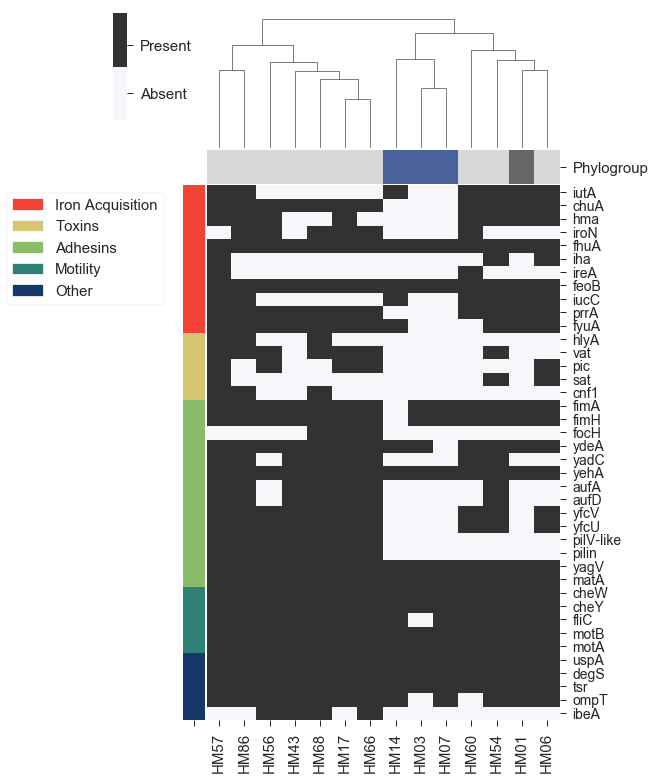

In [103]:
# Clustering the strains

strain_cluster = scipy.cluster.hierarchy.linkage(pa_mat.T, method="average")#distances between strains
sns.set_context("notebook", font_scale=1.5)
# Mapping colors
num_colors = len(function.unique())# there's 5
function_to_color = dict(zip(function.unique(), clrs))
phylogroup_to_color = dict(zip(strain_info.PRED_PHYLO.unique(), ["#666666", "#49639a", "#d8d8d8"]))
row_colors = function.map(function_to_color)
row_colors.name =""
col_colors = strain_pg.PRED_PHYLO.map(phylogroup_to_color)
col_colors.name="Phylogroup"
cmap = ListedColormap(["#f7f7fb", "#323232"])
fig = plt.figure()
# #Drawind the heatmap
g = sns.clustermap(pa_mat, row_cluster=False, col_linkage=strain_cluster, 
                    row_colors=row_colors, col_colors=col_colors, cmap=cmap,
                    figsize=(8,13));

# # Adjusting the x and y labels
la = g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);

# # Creating Legend
function_legend = [mpl.patches.Patch(color=c, label=l) for l,c in function_to_color.items()]
pg_legend = [mpl.patches.Patch(color=c, label=l) for l,c in phylogroup_to_color.items()]
l2 = g.ax_heatmap.legend(handles=function_legend, bbox_to_anchor=(-0.1,1), frameon=True)
# # Make a categorical colorbar

colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([ 0.25, 0.7])
colorbar.set_ticklabels([ 'Absent', 'Present'])
colorbar.solids.set_edgecolor("face")
fn = os.path.join(figures_folder, today+"_figure_1a.png")


g.savefig(fn, dpi=500, bbox_inches = "tight")

In [140]:
cft_rpkm = pd.read_csv(cft_rpkms_file, index_col =0)
cft_rpkm
uti89_rpkm = pd.read_csv(uti_rpkms_file, index_col=0)
rpkm_matrix = pd.concat([cft_rpkm, uti89_rpkm])
rpkm_matrix
meta
rpkms = meta.merge(rpkm_matrix, left_index=True, right_index=True).set_index("gene_name")
rpkms_ur = rpkms[[c for c in rpkms.columns if "UR" in c ]]
rpkms_ur.columns = [c.split("_")[0] for c in rpkms_ur.columns]
rpkms_ur.index.name=""
ur_norm = rpkms_ur.apply(invnorm)
rpkms_uti = rpkms[ [c for c in rpkms.columns if "UTI" in c ]]
rpkms_uti.columns = [c.split("_")[0] for c in rpkms_uti.columns]
rpkms_uti.index.name=""
#uti_norm = rpkms_ur.apply(invnorm)

ValueError: Shape of passed values is (14, 23), indices imply (14, 40)

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


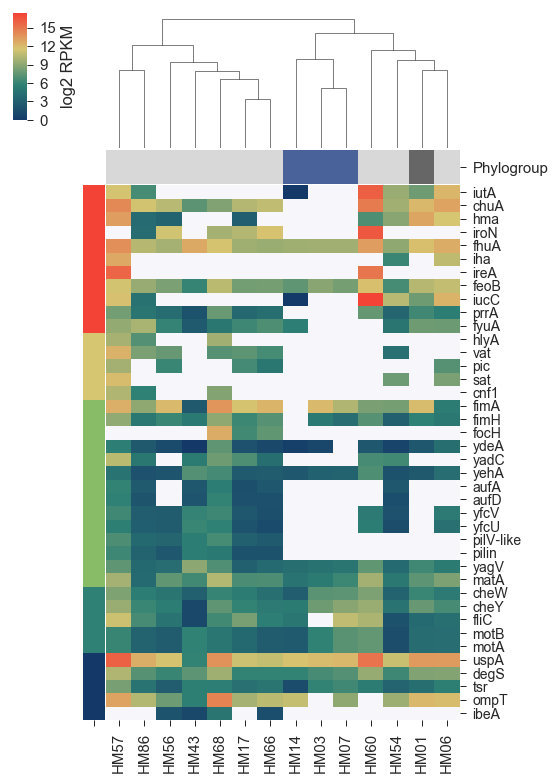

In [104]:
#URINE
cmap = my_cmap
cmap.set_bad(color='#f7f7fb')
#Drawind the heatmap
ur_h = sns.clustermap(np.log2(rpkms_ur+1), row_cluster=False, col_linkage=strain_cluster, 
                   row_colors=row_colors, col_colors=col_colors,cmap = cmap, 
                  figsize = (8,13), cbar_kws={"label":"log2 RPKM",
                                             });
# Adjusting the x and y labels
la = ur_h.ax_heatmap.set_yticklabels(ur_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);

fn = os.path.join(figures_folder, today+"_figure_1b.png")
ur_h.savefig(fn, dpi=500, bbox_inches = "tight")

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


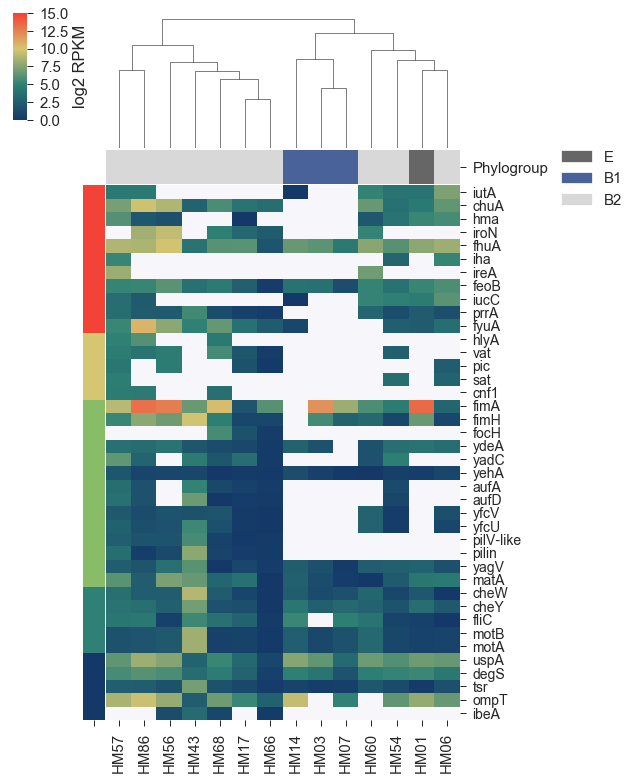

In [105]:
cmap = my_cmap
cmap.set_bad(color='#f7f7fb')
#Drawind the heatmap
uti_h = sns.clustermap(np.log2(rpkms_uti+1), row_cluster=False, col_linkage=strain_cluster, 
                   row_colors=row_colors, col_colors=col_colors,cmap = cmap, 
                  figsize = (8,13), cbar_kws={"label":"log2 RPKM"}, vmax=15);
# Adjusting the x and y labels
la = uti_h.ax_heatmap.set_yticklabels(uti_h.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 14);

l2 = uti_h.ax_heatmap.legend(handles=pg_legend, bbox_to_anchor=(1.5,1.09))

fn = os.path.join(figures_folder, today+"_figure_1c.png")
uti_h.savefig(fn, dpi=500, bbox_inches = "tight")

In [213]:
fig = plt.figure(figsize = (24,6))

a = uti_h.gca()
s = ur_h

AttributeError: 'ClusterGrid' object has no attribute 'gca'

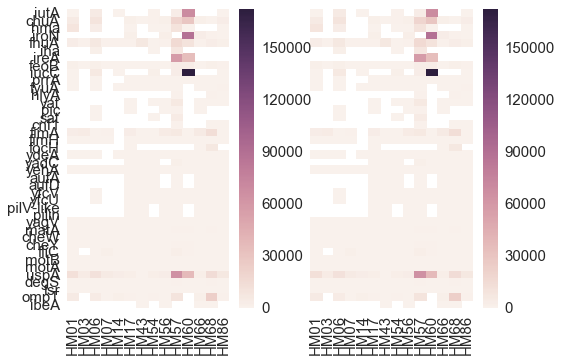

In [217]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)

for ax in axn.flat:
    sns.heatmap(rpkms_ur, ax=ax)